# K-Nearest Neighbors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
** Read the 'KNN_Data csv file into a dataframe **

In [2]:
df_target = pd.read_csv('KNN_Data')

**Check the head of the dataframe.**

In [3]:
#Output first three rows of the data frame. See df.head in pandas
df_target.head(3)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1


#Data Analysis

Since this data is artificial, we'll just do a large pairplot with seaborn.

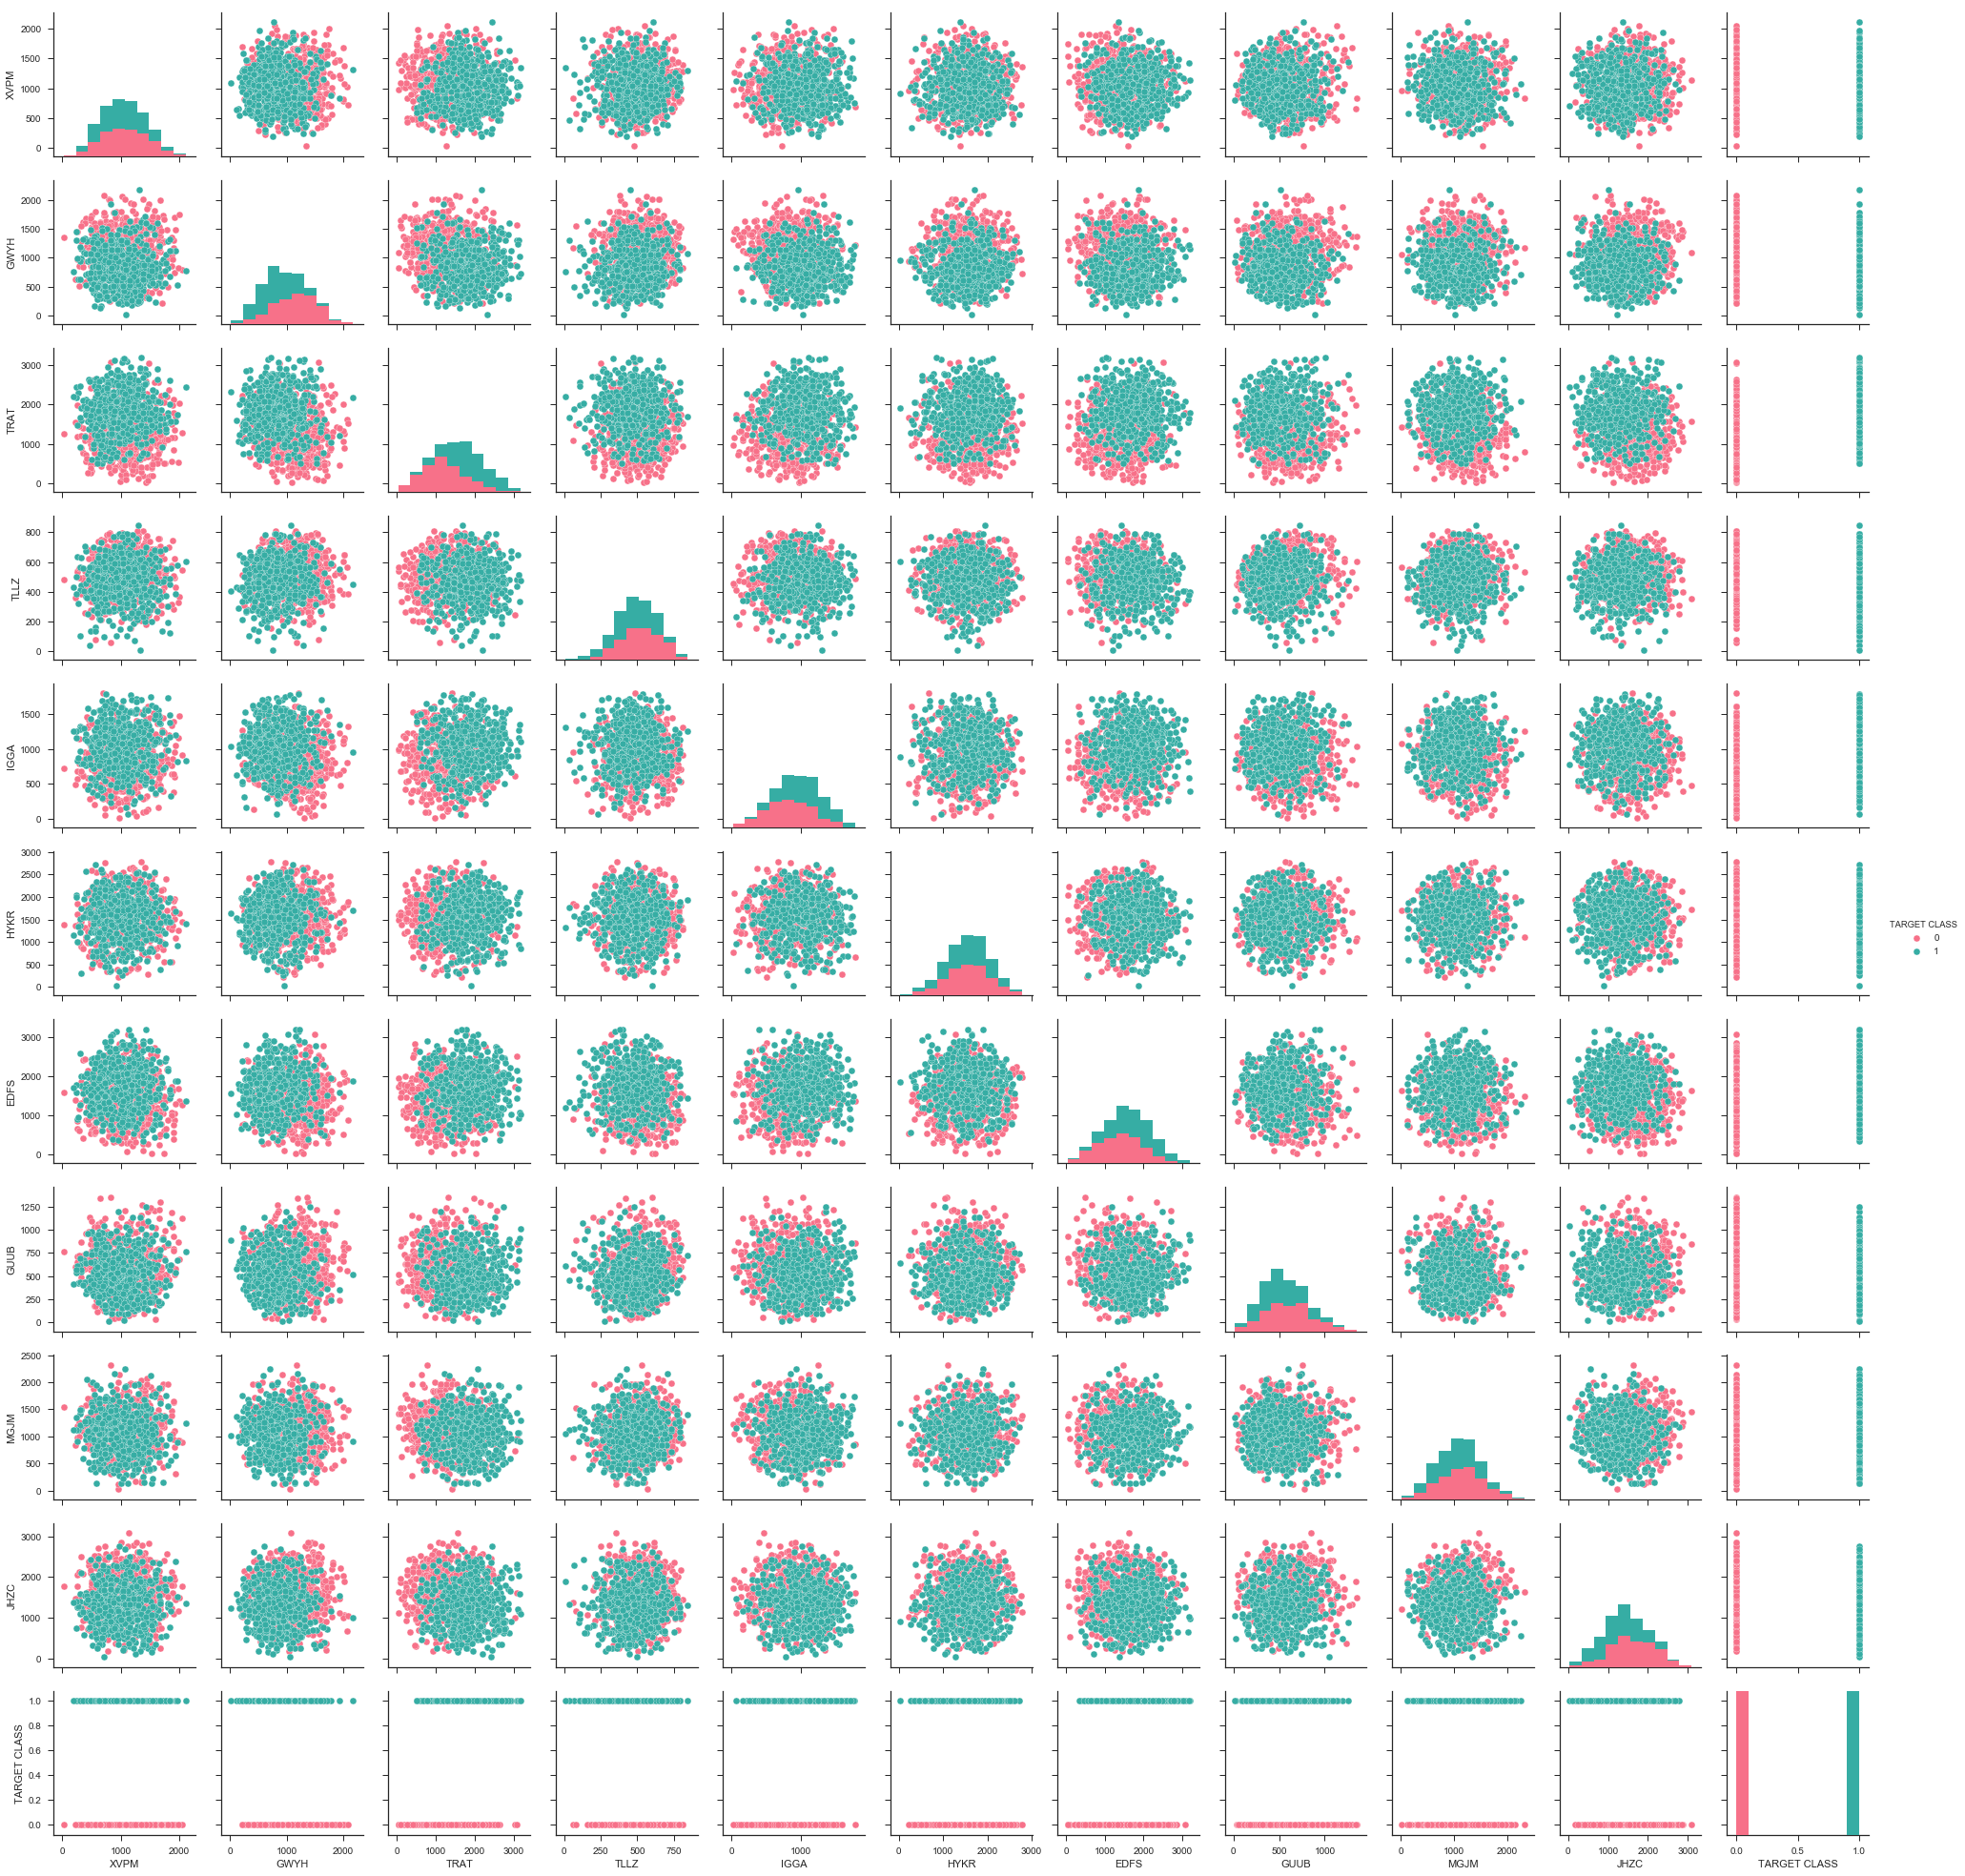

In [4]:
#**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**
#**i.e., see sns.pairplot**
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_target, hue="TARGET CLASS",palette="husl")

# Standardize the Variables

In [6]:
#** Import StandardScaler from Scikit learn.**
#Standardizing the features:
from sklearn.preprocessing import StandardScaler

In [7]:
#** Create a StandardScaler() object called scaler.**
scaler = StandardScaler()

** Fit scaler to the features.**

In [8]:
scaler.fit(df_target.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
#**Use the .transform() method to transform the features to a scaled version.**
array_std = scaler.transform(df_target.drop('TARGET CLASS', axis=1))
print(type(array_std))
print(array_std)

<class 'numpy.ndarray'>
[[ 1.56852168 -0.44343461  1.61980773 ... -0.93279392  1.00831307
  -1.06962723]
 [-0.11237594 -1.05657361  1.7419175  ... -0.46186435  0.25832069
  -1.04154625]
 [ 0.66064691 -0.43698145  0.77579285 ...  1.14929806  2.1847836
   0.34281129]
 ...
 [-0.35889496 -0.97901454  0.83771499 ... -1.51472604 -0.27512225
   0.86428656]
 [ 0.27507999 -0.99239881  0.0303711  ... -0.03623294  0.43668516
  -0.21245586]
 [ 0.62589594  0.79510909  1.12180047 ... -1.25156478 -0.60352946
  -0.87985868]]


In [10]:
#Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.
import pandas as pd
import numpy as np
# array_std.shape
print(array_std)
column_name_list = df_target.drop('TARGET CLASS', axis=1).columns
print(column_name_list)

df_std=pd.DataFrame(data=array_std[0:,0:],index=[i for i in range(array_std.shape[0])],columns=[el for el in column_name_list])
df_std.head()


[[ 1.56852168 -0.44343461  1.61980773 ... -0.93279392  1.00831307
  -1.06962723]
 [-0.11237594 -1.05657361  1.7419175  ... -0.46186435  0.25832069
  -1.04154625]
 [ 0.66064691 -0.43698145  0.77579285 ...  1.14929806  2.1847836
   0.34281129]
 ...
 [-0.35889496 -0.97901454  0.83771499 ... -1.51472604 -0.27512225
   0.86428656]
 [ 0.27507999 -0.99239881  0.0303711  ... -0.03623294  0.43668516
  -0.21245586]
 [ 0.62589594  0.79510909  1.12180047 ... -1.25156478 -0.60352946
  -0.87985868]]
Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**  
**Make test set 30% of the data.**

In [11]:
X = df_std
y = df_target.iloc[:,10]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print(len(X_train),len(X_test),len(y_train),len(y_test))


700 300 700 300


# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [13]:
knn = KNeighborsClassifier(n_neighbors=1, 
                           p=2, 
                           metric='minkowski')

# p : integer, optional (default = 2) Power parameter for the Minkowski metric.
# When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.
# For arbitrary p, minkowski_distance (l_p) is used.

**Fit this KNN model to the training data.**

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [15]:
from sklearn import metrics
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7633333333333333


** Create a confusion matrix and classification report.**

![confusion_matrix](confusion_matrix.png "confusion_matrix")

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
#print the confusion_matrix
# Check the results using metrics
from sklearn import metrics
print("confusion_matrix: \n{}".format(metrics.confusion_matrix(y_test, y_pred)))

#calculate error rate
conf_list = metrics.confusion_matrix(y_pred, y_test).tolist()
error_rate_computed = (conf_list[0][0]+conf_list[1][1])/300
print(error_rate_computed)

confusion_matrix: 
[[112  38]
 [ 33 117]]
0.7633333333333333


In [18]:
#print the classification_report
from sklearn.metrics import classification_report
print("\nclassification_report:\n {}".format(classification_report(y_test, y_pred)))


classification_report:
              precision    recall  f1-score   support

          0       0.77      0.75      0.76       150
          1       0.75      0.78      0.77       150

avg / total       0.76      0.76      0.76       300



# Choosing a K Value
**let's pick a good value of K by ploting the Error Rate vs. no of K nearest neighbors**
**The error rate is the number of incorrect predictions divided by the total number of points**
** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [32]:
import numpy as np
error_rate = []

#complete this. Use a for loop of range(1,40) for n_neighbors = i in KNeighborsClassifier classifier

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, 
                           p=2, 
                           metric='minkowski')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf_list = metrics.confusion_matrix(y_pred, y_test).tolist()
    error_rate_computed = (conf_list[0][0]+conf_list[1][1])/300
    error_rate.append(error_rate_computed)

for i,el in enumerate(error_rate):
    print(i,el)
    

0 0.7633333333333333
1 0.7833333333333333
2 0.7933333333333333
3 0.8233333333333334
4 0.82
5 0.85
6 0.84
7 0.8533333333333334
8 0.8433333333333334
9 0.85
10 0.85
11 0.8566666666666667
12 0.8333333333333334
13 0.84
14 0.8366666666666667
15 0.8233333333333334
16 0.82
17 0.83
18 0.8266666666666667
19 0.8366666666666667
20 0.8366666666666667
21 0.84
22 0.8333333333333334
23 0.8366666666666667
24 0.8233333333333334
25 0.82
26 0.8366666666666667
27 0.84
28 0.8366666666666667
29 0.8366666666666667
30 0.83
31 0.8433333333333334
32 0.83
33 0.84
34 0.8366666666666667
35 0.8466666666666667
36 0.8433333333333334
37 0.8566666666666667
38 0.83


**Now create the following plot using the information from your for loop.**

Text(0,0.5,'Error Rate')

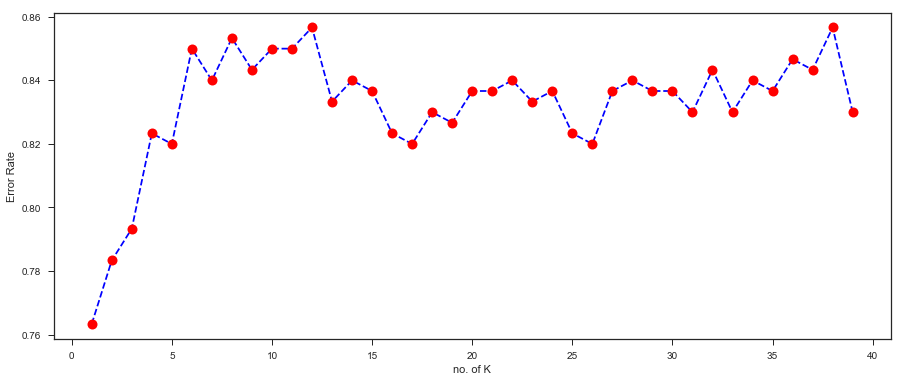

In [33]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

## Retrain with new K Value

In [34]:
'''Retrain your model with the best K value from above analysis
and re-print the classification report and the confusion matrix.'''
#this should be ~5 lines of code
knn = KNeighborsClassifier(n_neighbors=11, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("confusion_matrix: \n{}".format(metrics.confusion_matrix(y_test, y_pred)))
print("\nclassification_report:\n {}".format(classification_report(y_test, y_pred)))

confusion_matrix: 
[[123  27]
 [ 18 132]]

classification_report:
              precision    recall  f1-score   support

          0       0.87      0.82      0.85       150
          1       0.83      0.88      0.85       150

avg / total       0.85      0.85      0.85       300

